In [1]:
setwd("/home/victor/OneDrive/Online Courses/MITx 15.071x The Analytics Edge")

In [3]:
trials = read.csv("Unit5_1/Unit5_1/clinical_trial.csv", stringsAsFactors = FALSE)
str(trials)

'data.frame':	1860 obs. of  3 variables:
 $ title   : chr  "Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962)." "Cell mediated immune status in malignancy--pretherapy and post-therapy assessment." "Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breas"| __truncated__ "Randomized phase 3 trial of fluorouracil, epirubicin, and cyclophosphamide alone or followed by Paclitaxel for "| __truncated__ ...
 $ abstract: chr  "" "Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population bef"| __truncated__ "BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with un"| __truncated__ "BACKGROUND: Taxanes are among the most active drugs for the treatment of metastatic breast cancer, and, as a co"| __truncated__ ...
 $ trial   : int  1 0 1 1 1 0 1 0 0 0 ...


In [4]:
max(nchar(trials$abstract))

[1] 3708

In [6]:
table(nchar(trials$abstract) == 0)


FALSE  TRUE 
 1748   112 

In [10]:
trials$title[which.min(nchar(trials$title))]

[1] "A decade of letrozole: FACE."

In [11]:
library(tm)

Loading required package: NLP


In [17]:
corpusTitle = Corpus(VectorSource(trials$title))
corpusAbstract = Corpus(VectorSource(trials$abstract))

In [18]:
corpusTitle = tm_map(corpusTitle, tolower)
corpusAbstract = tm_map(corpusAbstract, tolower)

Warning message in tm_map.SimpleCorpus(corpusTitle, tolower):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpusAbstract, tolower):
“transformation drops documents”

In [19]:
corpusTitle = tm_map(corpusTitle, removePunctuation)
corpusAbstract = tm_map(corpusAbstract, removePunctuation)

Warning message in tm_map.SimpleCorpus(corpusTitle, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpusAbstract, removePunctuation):
“transformation drops documents”

In [20]:
corpusTitle = tm_map(corpusTitle, removeWords, stopwords("english"))
corpusAbstract = tm_map(corpusAbstract, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(corpusTitle, removeWords, stopwords("english")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpusAbstract, removeWords, stopwords("english")):
“transformation drops documents”

In [21]:
corpusTitle = tm_map(corpusTitle, stemDocument)
corpusAbstract = tm_map(corpusAbstract, stemDocument)

Warning message in tm_map.SimpleCorpus(corpusTitle, stemDocument):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpusAbstract, stemDocument):
“transformation drops documents”

In [22]:
dtmTitle = DocumentTermMatrix(corpusTitle)
dtmAbstract = DocumentTermMatrix(corpusAbstract)

In [23]:
dtmTitle = removeSparseTerms(dtmTitle, 0.95)
dtmAbstract = removeSparseTerms(dtmAbstract, 0.95)

In [24]:
dtmTitle = as.data.frame(as.matrix(dtmTitle))
colnames(dtmTitle) = make.names(colnames(dtmTitle))

In [25]:
dtmAbstract = as.data.frame(as.matrix(dtmAbstract))
colnames(dtmAbstract) = make.names(colnames(dtmAbstract))

In [26]:
length(dtmTitle)

[1] 31

In [27]:
length(dtmAbstract)

[1] 335

In [30]:
sort(colSums(dtmAbstract))

regard           seven            larg           avail     progesteron 
            105             108             108             108             114 
          trend            caus      comparison       hematolog           shown 
            115             115             116             117             117 
          enter    characterist         regress           major           defin 
            117             119             120             122             123 
         analyz            base           eight            X005          select 
            124             124             124             124             124 
         inform         proport         prolong            type       multicent 
            124             125             125             126             126 
        general           limit        histolog            need           andor 
            126             127             127             128             128 
        possibl          consid            main           start          import 
            130             131             131             131             138 
         second           estim         prevent        particip           human 
            138             139             143             144             144 
         obtain          detect        identifi           singl        independ 
            147             148             148             149             149 
        distant     doubleblind            evid   receptorposit            term 
            149             149             150             152             153 
       frequent       multivari           stabl             due          provid 
            153             154             154             154             155 
        potenti       secondari          remain          profil  progressionfre 
            156             158             158             158             158 
       superior           popul            X001          appear      mastectomi 
            161             162             162             164             165 
      experienc        sequenti          requir            side            X500 
            167             168             168             168             169 
         period        aromatas             new           sampl          within 
            170             171             171             172             172 
         wherea            five           vomit        pretreat           least 
            173             173             174             175             177 
           size            find          postop          analys         conduct 
            177             177             177             177             177 
           life         confirm          involv           model        firstlin 
            178             178             180             180             182 
      inhibitor          accord         support            site             aim 
            182             182             183             183             185 
         better       function.          marker         qualiti          examin 
            186             188             189             189             190 
            can          common        although             set        subgroup 
            191             191             191             191             192 
       intraven            oper          longer          system           hundr 
            192             193             193             193             195 
           elig             low           tissu       nodeposit            seen 
            196             196             197             199             199 
        consist         respond           point          correl    anthracyclin 
            200             200             202             203             207 
 X5fluorouracil          growth        endpoint           death    fluorouracil 
            208             208         

In [32]:
colnames(dtmTitle) = paste0("T", colnames(dtmTitle))
colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

In [34]:
dtm = cbind(dtmTitle, dtmAbstract)

In [35]:
dtm$trial = trials$trial

In [36]:
str(dtm)

'data.frame':	1860 obs. of  367 variables:
 $ Tcancer         : num  1 0 1 1 1 1 0 1 1 2 ...
 $ Ttreatment      : num  1 0 0 0 1 0 0 0 0 1 ...
 $ Tbreast         : num  0 0 1 1 1 1 0 1 1 1 ...
 $ Tearli          : num  0 0 1 1 0 0 0 1 0 0 ...
 $ Tiii            : num  0 0 1 0 0 0 0 0 0 1 ...
 $ Tphase          : num  0 0 1 1 0 0 0 0 0 1 ...
 $ Trandom         : num  0 0 1 1 1 0 0 0 0 1 ...
 $ Ttrial          : num  0 0 1 1 1 0 0 1 1 1 ...
 $ Tversus         : num  0 0 1 0 0 0 0 1 0 0 ...
 $ Tcyclophosphamid: num  0 0 0 1 0 0 0 0 0 0 ...
 $ Tchemotherapi   : num  0 0 0 0 1 1 0 0 0 0 ...
 $ Tcombin         : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Teffect         : num  0 0 0 0 1 0 0 1 0 1 ...
 $ Tmetastat       : num  0 0 0 0 1 0 0 0 0 0 ...
 $ Tpatient        : num  0 0 0 0 1 0 1 0 1 1 ...
 $ Trespons        : num  0 0 0 0 0 1 0 0 0 0 ...
 $ Tadvanc         : num  0 0 0 0 0 0 1 0 0 0 ...
 $ Tpostmenopaus   : num  0 0 0 0 0 0 0 1 1 0 ...
 $ Trandomis       : num  0 0 0 0 0 0 0 1 1 0 ...
 $ Tstu

In [38]:
library(caTools)

In [43]:
set.seed(144)
spl = sample.split(dtm$trial , 0.7)
train = subset(dtm, spl == TRUE)
test = subset(dtm, spl == FALSE)

In [44]:
table(train$trial)


  0   1 
730 572 

In [45]:
table(test$trial)


  0   1 
313 245 

In [46]:
accBaseline = 313/nrow(test)
accBaseline

[1] 0.5609319

In [48]:
library(rpart)
library(rpart.plot)

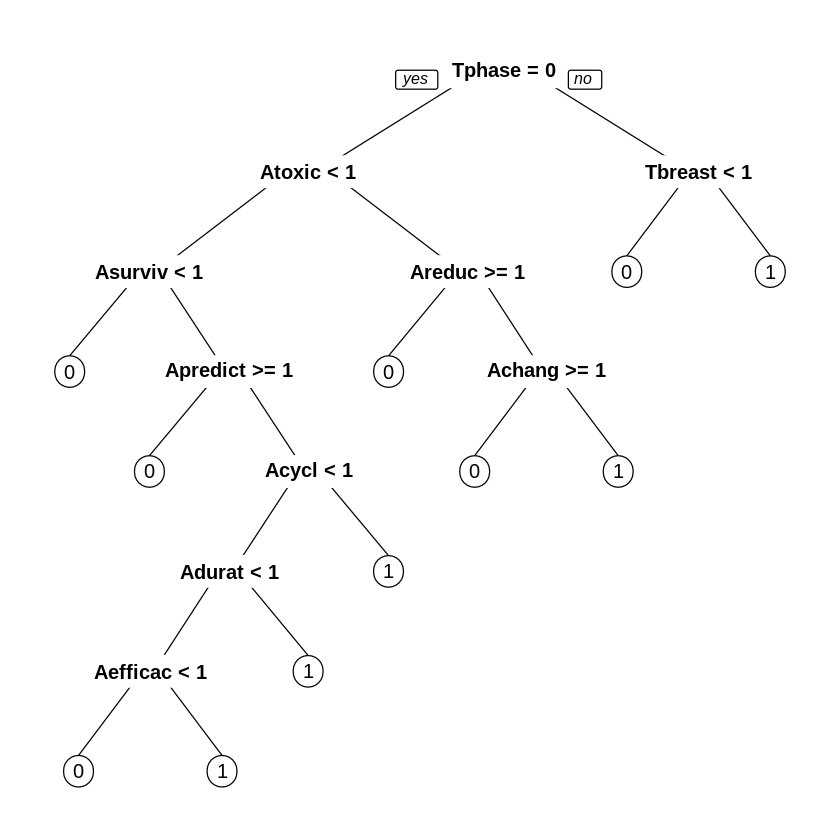

In [49]:
trialCART = rpart(trial ~. , data = train, method = "class")
prp(trialCART)

In [54]:
predTrain = predict(trialCART)
max(predTrain[,2])

[1] 0.8718861

In [57]:
table(train$trial,predTrain[,2] >= 0.5)

   
    FALSE TRUE
  0   631   99
  1   131  441

In [58]:
accTrain = (631 + 441)/nrow(train)
accTrain

[1] 0.8233487

In [59]:
sensitivity = (441)/(441 + 131)
sensitivity

[1] 0.770979

In [60]:
specifity = (631)/(631 + 99)
specifity

[1] 0.8643836

In [84]:
predTest = predict(trialCART, newdata = test)[,2]
table(test$trial,predTest >= 0.5)

   
    FALSE TRUE
  0   261   52
  1    83  162

In [85]:
accTest = (261 + 162)/nrow(test)
accTest

[1] 0.7580645

In [86]:
library(ROCR)

In [87]:
ROCRpredTest = prediction(predTest, test$trial)
auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)
auc

[1] 0.8371063

In [88]:
predTest = predict(trialCART, newdata = test)[,2]
table(test$trial,predTest >= 0.2)

   
    FALSE TRUE
  0   215   98
  1    29  216

In [89]:
predTest = predict(trialCART, newdata = test)[,2]
table(test$trial,predTest >= 0.8)

   
    FALSE TRUE
  0   301   12
  1   152   93